In [582]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sb

In [583]:
#copy DF for visualization 
visualDf= pd.read_csv("DataFrame_final_visual.csv").copy()
visualDf.head()


,Unnamed: 0,contry,Industry,Market_Cap,P_E,Avg_Volume,EPS_this_Y,EPS_next_Y,rating,Global_Company_Size,Founded,Revenue,Recommend_to_friend,Approve_of_CEO,inSNP500,Index
0,0,1,35,4.386000e+10,1,1490000,320.5,704.50,4,10000+ Employees,1999,$2 to $5 billion (USD),78,92,1,NYSE
1,1,1,5,6.000000e+09,1,6700000,85.0,6.05,3,10000+ Employees,1888,$10+ billion (USD),72,78,0,NYSE
2,2,1,102,1.322400e+08,0,215190,-743.4,44.69,2,1 to 50 Employees,1996,$50 to $100 million (USD),0,0,0,NYSE
3,3,1,3,1.425000e+10,0,34780000,-583.8,97.70,2,1001 to 5000 Employees,1921,$1 to $2 billion (USD),31,76,1,NASD
4,4,1,112,1.160000e+09,0,290350,320.5,704.50,4,51 to 200 Employees,1996,$25 to $50 million (USD),81,95,0,NYSE


Text(0.5, 0, 'contry')

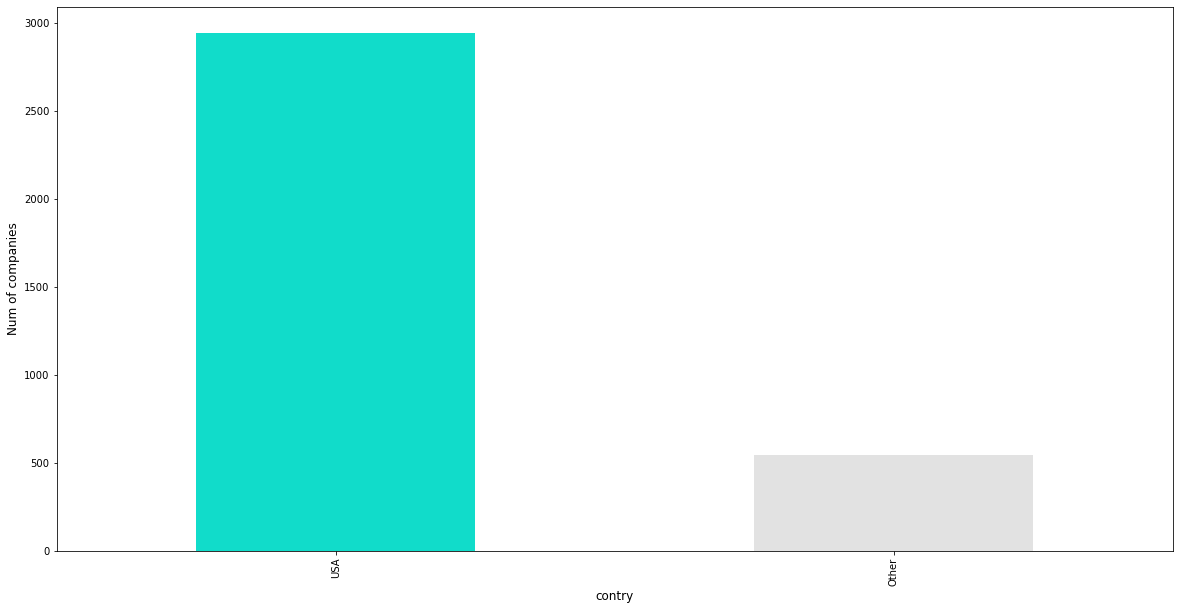

In [584]:
#Where are the shares invested
contry_type = {1 : 'USA' , 0 : 'Other'}
visualDf["contry_type"] = visualDf["contry"].map(lambda x: contry_type[x])
mycolors = ['#11dcca', '#e2e2e2']
visualDf["contry_type"].value_counts().plot(figsize=(20,10), kind='bar', color = mycolors)
plt.ylabel("Num of companies", fontsize=12)
plt.xlabel("contry", fontsize=12)

Text(0.5, 0, 'In S&P 500')

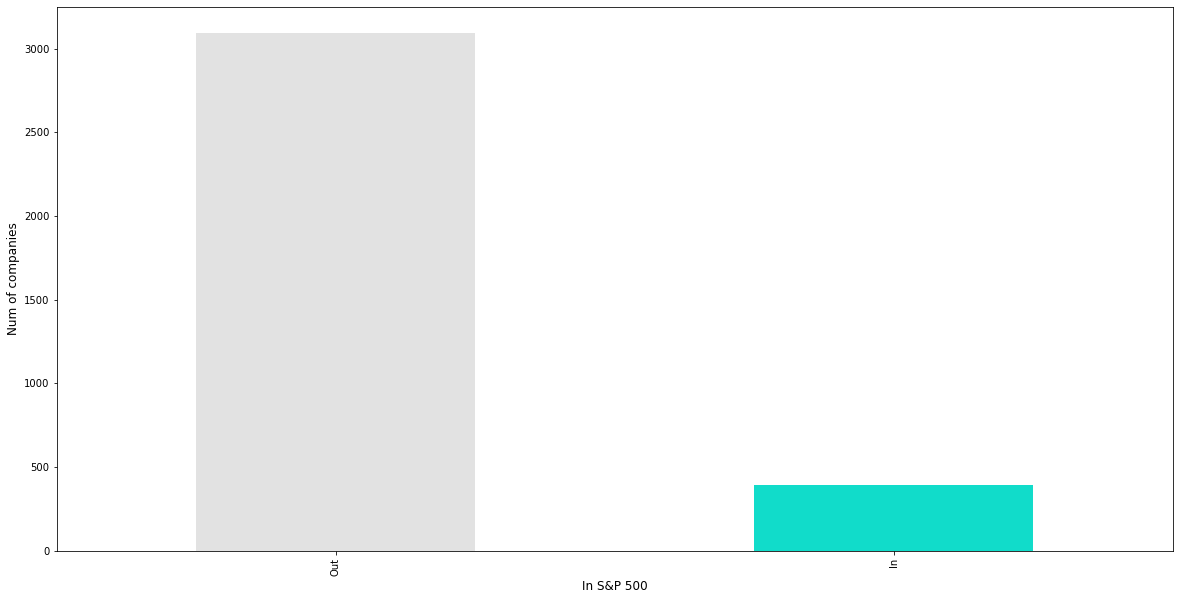

In [585]:
# is the share in S&P 500 
SNP_type = {1 : 'In' , 0 : 'Out'}
visualDf["SNP_type"] = visualDf["inSNP500"].map(lambda x: SNP_type[x])
mycolors = [ '#e2e2e2', '#11dcca']
visualDf["SNP_type"].value_counts().plot(figsize=(20,10), kind='bar', color = mycolors)
plt.ylabel("Num of companies", fontsize=12)
plt.xlabel("In S&P 500", fontsize=12)

Text(0, 0.5, 'Num Of Companies')

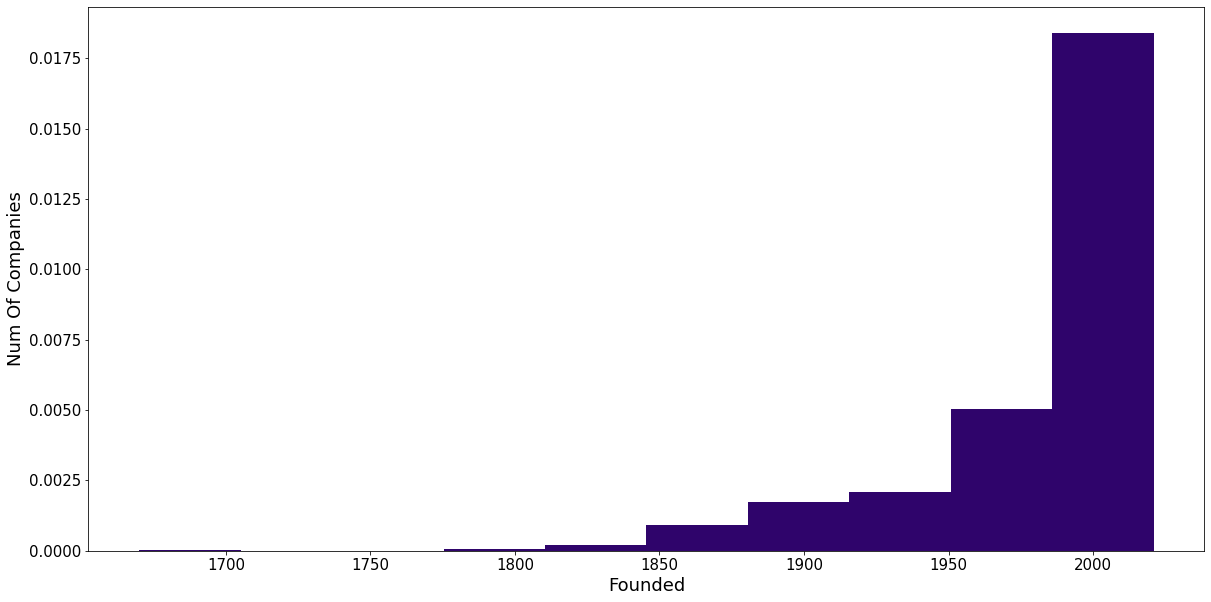

In [586]:
title = "Foundetion Year"
visualDf["Founded"].plot.hist(figsize=(20,10),fontsize=15, density = True, color = '#2f046b')
plt.xlabel('Founded',fontsize=18)
plt.ylabel('Num Of Companies',fontsize=18)


Text(0, 0.5, ' ')

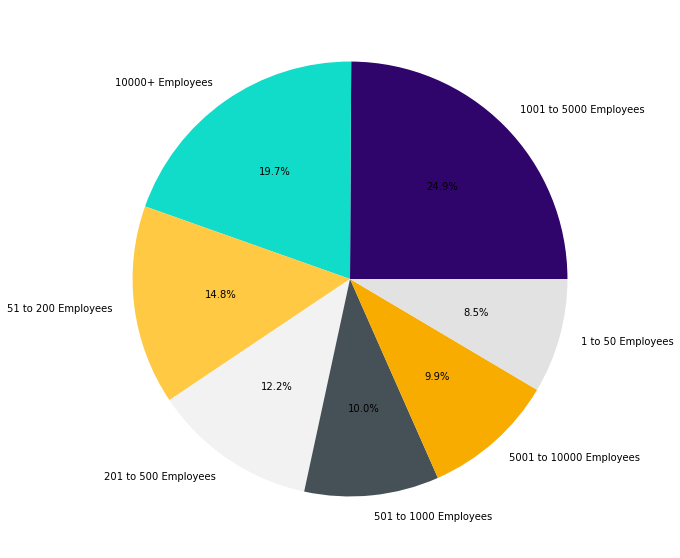

In [591]:
visualDf["Global_Company_Size"].value_counts().plot(figsize=(20,10), kind='pie' , colors = ['#2f046b', '#11dcca', '#ffc944', '#f2f2f2', '#465157', '#f9ac00' ,'#e2e2e2'], autopct="%.1f%%")
plt.ylabel(" ")

Text(0, 0.5, ' ')

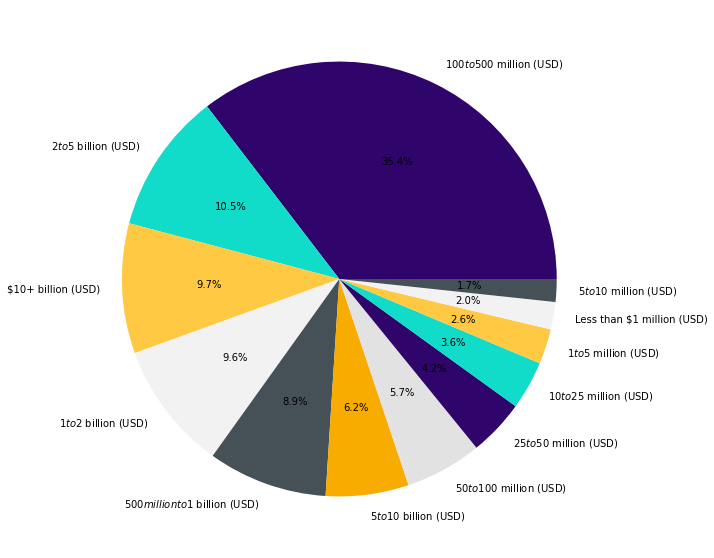

In [592]:
# company revenue 
visualDf["Revenue"].value_counts().plot(figsize=(20,10), kind='pie' , colors = ['#2f046b', '#11dcca', '#ffc944', '#f2f2f2', '#465157', '#f9ac00' ,'#e2e2e2'], autopct="%.1f%%")
plt.ylabel(" ")

Text(0, 0.5, 'Num Of Companies')

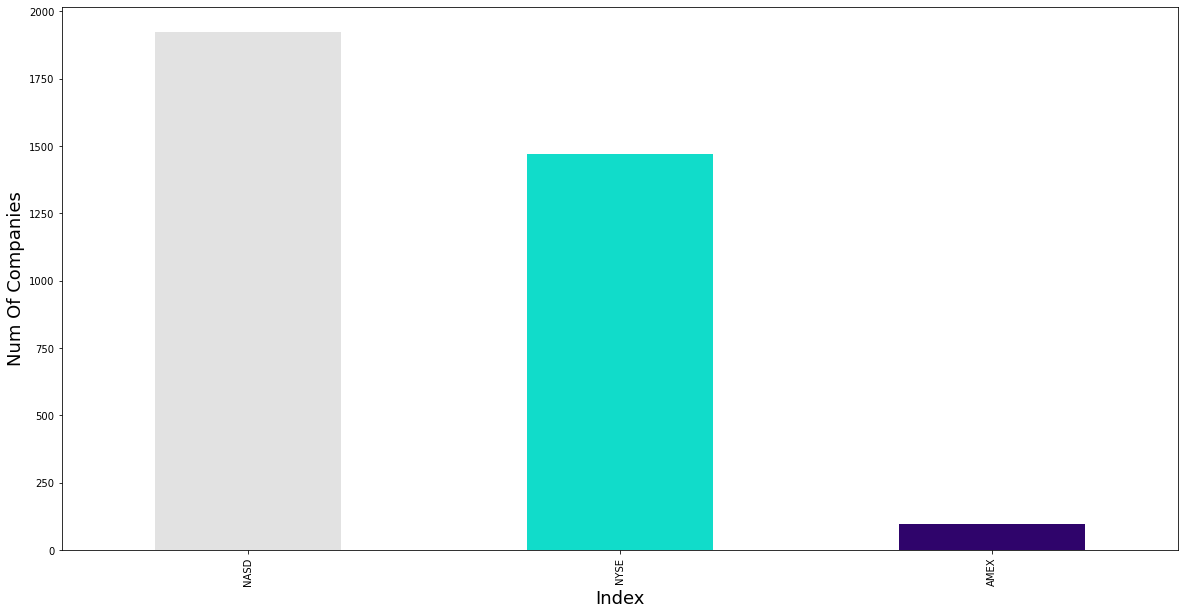

In [589]:

mycolors = [ '#e2e2e2', '#11dcca', '#2f046b']
visualDf["Index"].value_counts().plot(figsize=(20,10), kind='bar', color = mycolors)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Num Of Companies',fontsize=18)


<AxesSubplot:xlabel='rating', ylabel='Density'>

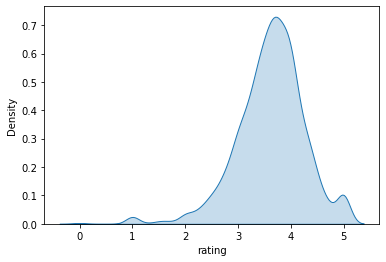

In [563]:

sns.kdeplot(visualDf1.rating, shade=True)

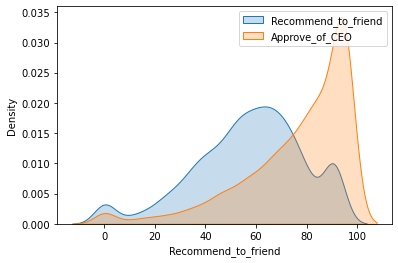

In [564]:
sns.kdeplot(visualDf.Recommend_to_friend, shade=True)
sns.kdeplot(visualDf.Approve_of_CEO, shade=True)
plt.legend(['Recommend_to_friend', 'Approve_of_CEO'])

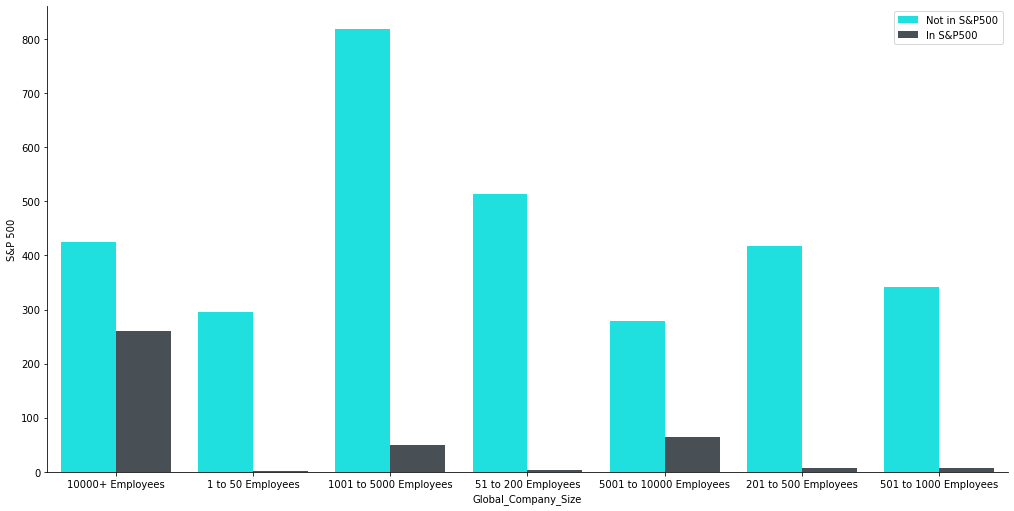

In [565]:
g = sns.catplot(x='Global_Company_Size', data=visualDf ,kind='count', hue='inSNP500',
    palette=["cyan", "#465157"], 
    height=7, 
    aspect=2,
    legend=False,
    ).set_axis_labels('Global_Company_Size', 'S&P 500')
g.ax.legend(labels=['Not in S&P500','In S&P500'])

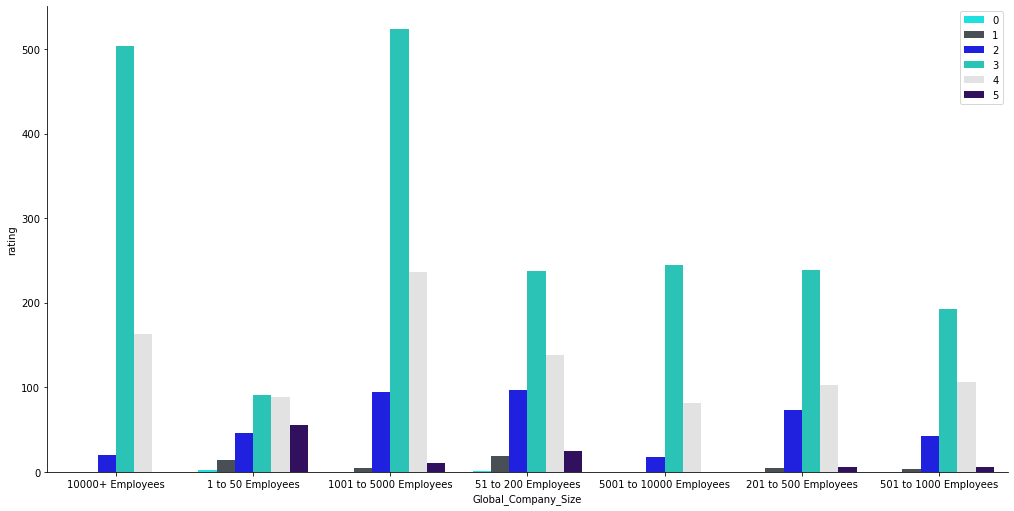

In [566]:
df= visualDf.copy()

g = sns.catplot(x='Global_Company_Size', data=visualDf ,kind='count', hue='rating',
    palette=["cyan", "#465157", "blue" , "#11dcca" , '#e2e2e2', '#2f046b'], 
    height=7, 
    aspect=2,
    legend=False,
    ).set_axis_labels('Global_Company_Size', 'rating')
g.ax.legend(labels=['0','1','2', '3' ,'4' , '5'])


<AxesSubplot:xlabel='rating', ylabel='EPS_next_Y'>

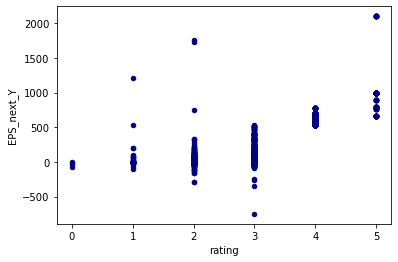

In [567]:
visualDf.plot.scatter(x='rating', y='EPS_next_Y',c='DarkBlue', colormap='viridis')

<AxesSubplot:xlabel='rating', ylabel='EPS_this_Y'>

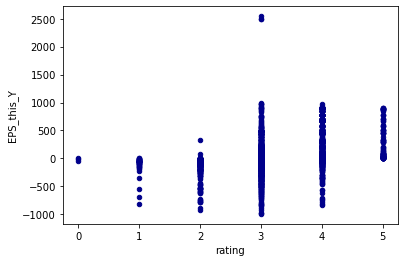

In [568]:
visualDf.plot.scatter(x='rating', y='EPS_this_Y',c='DarkBlue', colormap='viridis')

<AxesSubplot:xlabel='rating', ylabel='EPS_next_Y'>

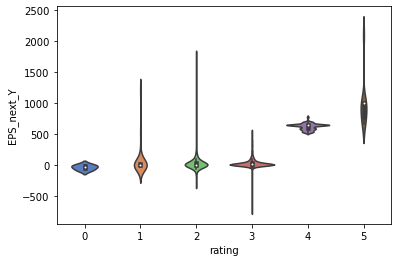

In [569]:
sns.violinplot(x="rating", y="EPS_next_Y", data=visualDf, palette="muted")

<AxesSubplot:xlabel='rating', ylabel='EPS_this_Y'>

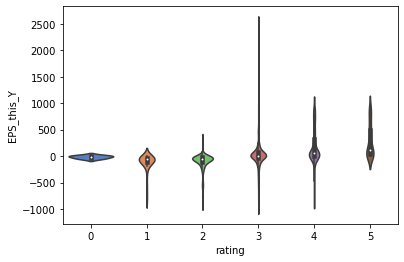

In [570]:
sns.violinplot(x="rating", y="EPS_this_Y", data=visualDf, palette="muted")

<AxesSubplot:>

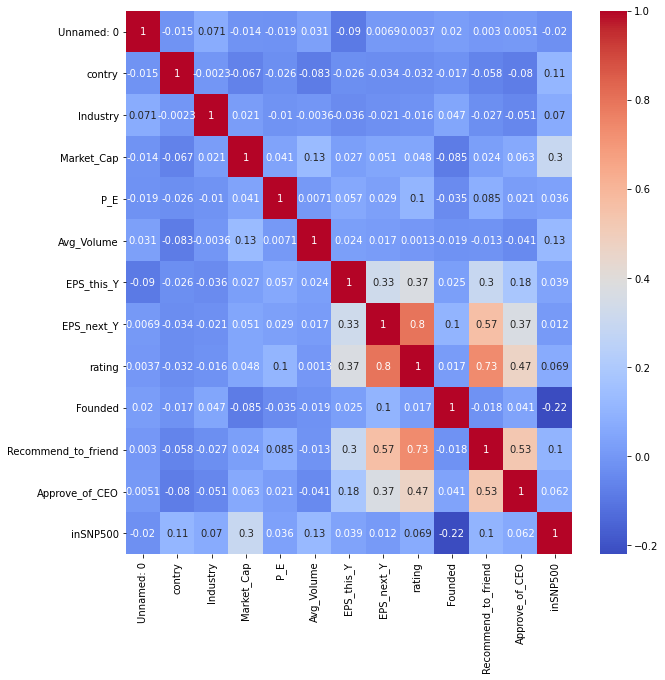

In [571]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(visualDf.corr(), annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

C:\Users\einav.malcka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\einav.malcka\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


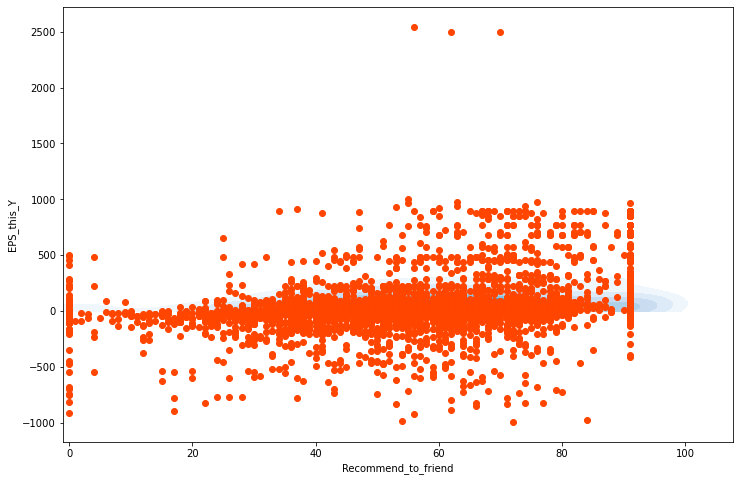

In [572]:
fig, ax = plt.subplots(1, figsize=(12,8))
sb.kdeplot(visualDf.Recommend_to_friend, visualDf.EPS_this_Y, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(visualDf.Recommend_to_friend, visualDf.EPS_this_Y, color='orangered')

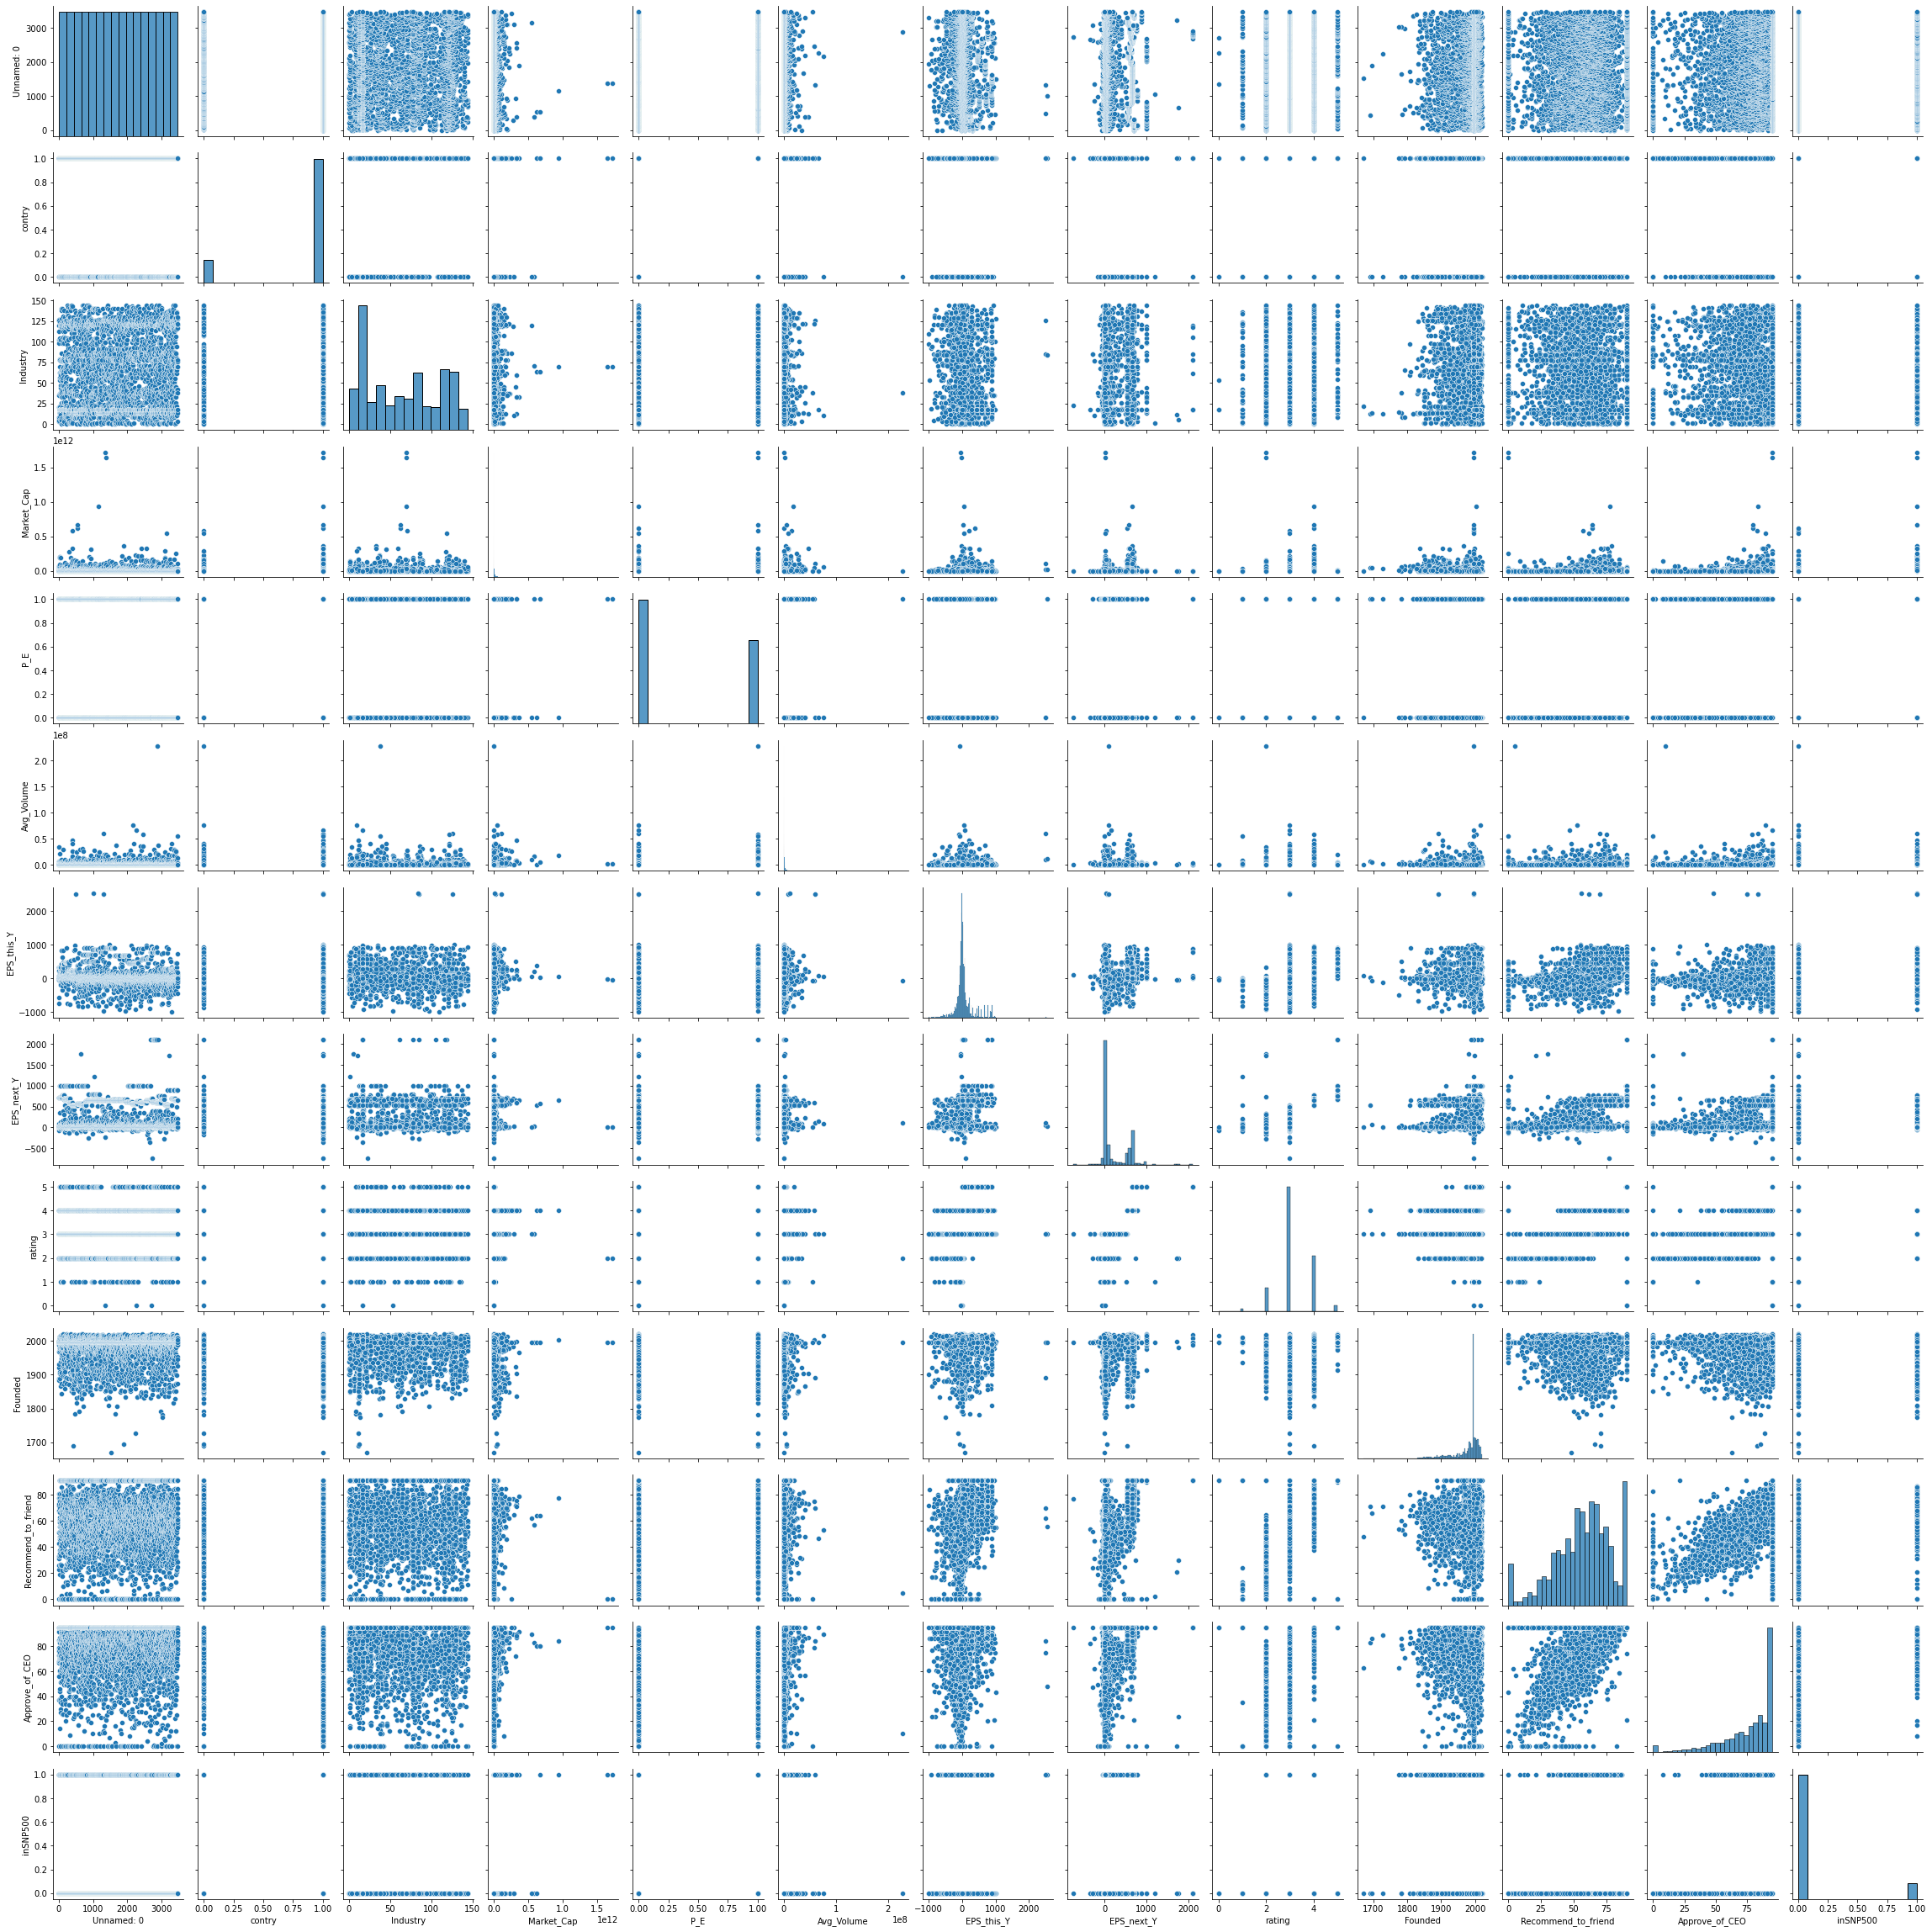

In [574]:
sns.pairplot(visualDf)

<AxesSubplot:xlabel='Approve_of_CEO', ylabel='Market_Cap'>

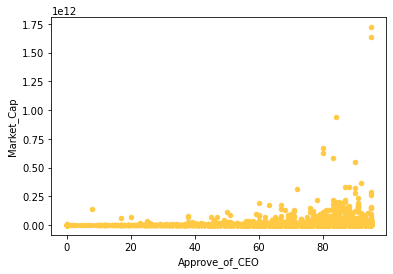

In [575]:
visualDf.plot.scatter(x='Approve_of_CEO',  y='Market_Cap', c='#ffc944')

<AxesSubplot:xlabel='Recommend_to_friend', ylabel='Market_Cap'>

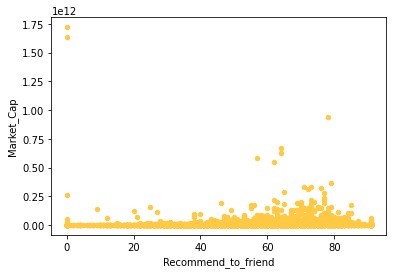

In [576]:
visualDf.plot.scatter(x='Recommend_to_friend',  y='Market_Cap', c='#ffc944')

<AxesSubplot:xlabel='Recommend_to_friend', ylabel='Approve_of_CEO'>

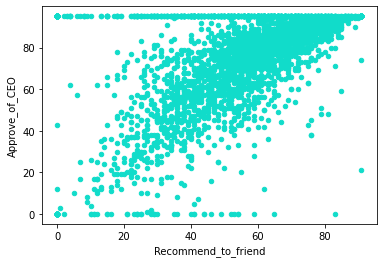

In [577]:
visualDf.plot.scatter(x='Recommend_to_friend',  y='Approve_of_CEO', c='#11dcca')

<AxesSubplot:xlabel='Industry', ylabel='Market_Cap'>

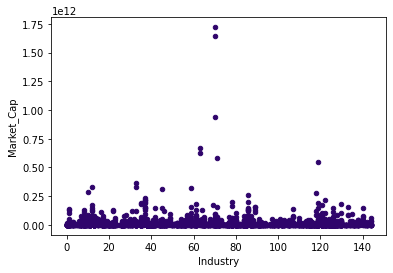

In [578]:
# highest market cap in industry 70 (Internet Content & Information)

visualDf.plot.scatter(x='Industry',  y='Market_Cap', c='#2f046b')

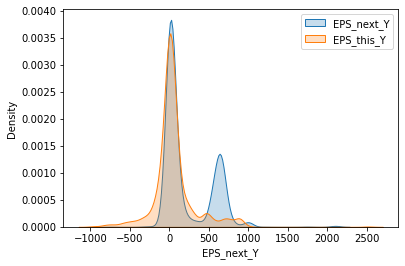

In [580]:
sns.kdeplot(visualDf.EPS_next_Y, shade=True)
sns.kdeplot(visualDf.EPS_this_Y, shade=True)
plt.legend(['EPS_next_Y', 'EPS_this_Y'])

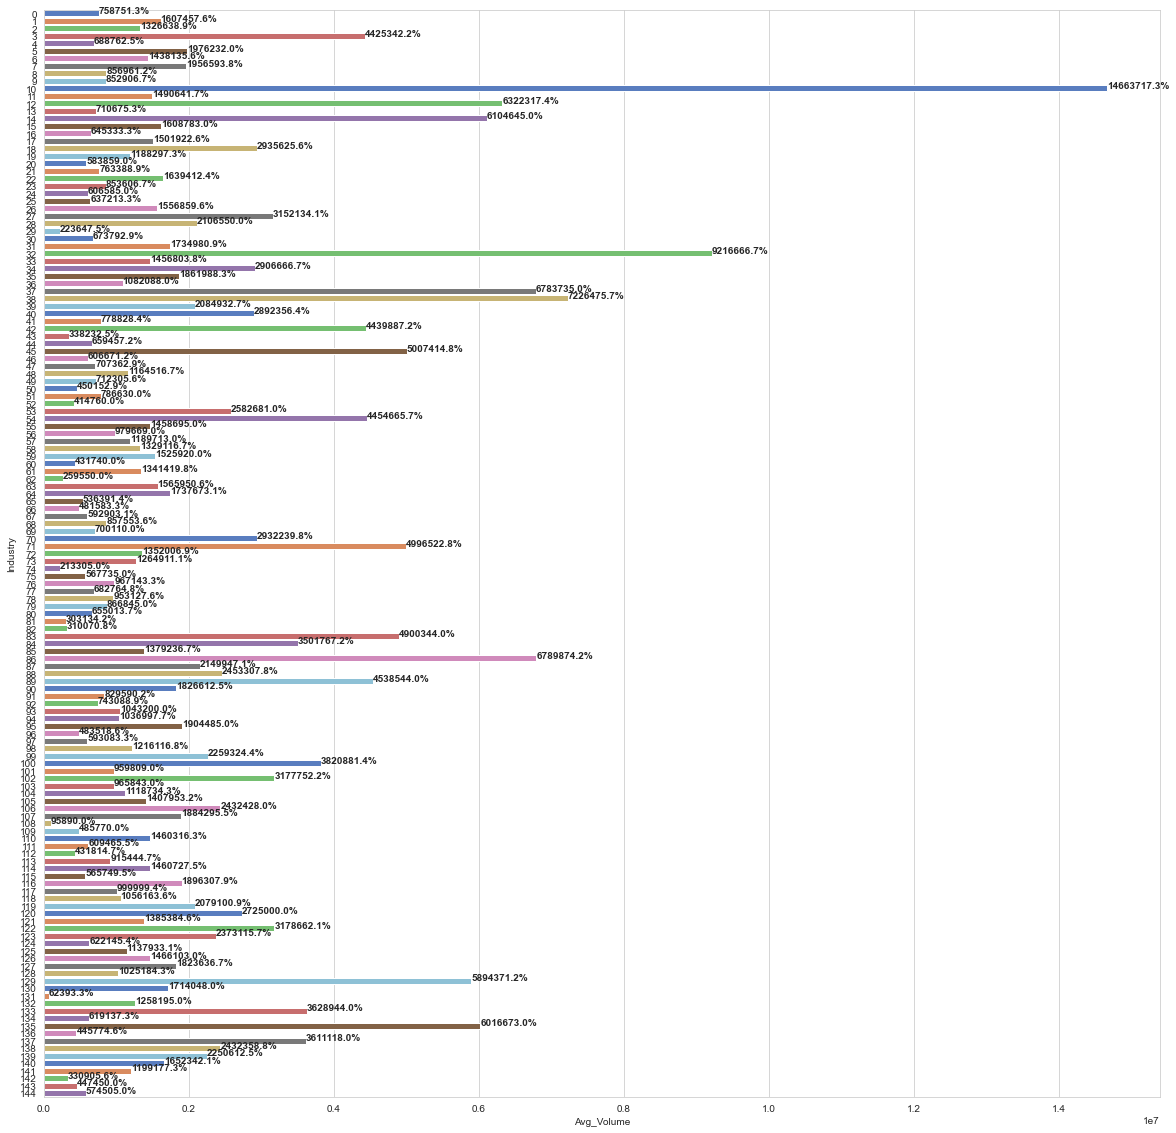

In [603]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,20))
ax = sns.barplot(x="Avg_Volume", y="Industry", data=visualDf, ci=None, palette="muted",orient='h' )
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )